# Tutorial Week 5 - Ong Jia Lung 2104616# 

### Exercise 1
##### Rotate image by 45 degrees without cropping the sides of the image. (Hint: There are 2 strategies to tackle these problems). Use "lena.jfif" as the input image. 
##### 1 Use external libraries imutils .
##### 2 Modify the transformation matrix.

In [8]:
pip install imutils

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for imutils: filename=imutils-0.5.4-py3-none-any.whl size=25854 sha256=60bbc2c859617fedefc71ca8143af8628a8745e2d8901e637b49028739940b16
  Stored in directory: c:\users\ongji\appdata\local\pip\cache\wheels\c2\02\32\f3617a9f68bcc67eda3ebeb4514eba18f62e81ff439428109d
Successfully built imutils
Note: you may need to restart the kernel to use updated packages.


In [10]:
import imutils as im
import cv2 as cv

img = cv.imread("images/lena.jfif")
h, w = img.shape[:2]
yc,xc = h//2, w//2

angle = 45

rotated = im.rotate(img,angle)

cv.imshow("Original", img)
cv.imshow("Rotated", rotated)
cv.waitKey(0)
cv.destroyAllWindows()

### Exercise 2
##### Use the images with titles: "flower.jfif" and "native-bee.png". I want to put flower above an image. If I add two images, it will change color. If I blend it, I get a transparent effect. But I want it to be opaque. If it was a rectangular region, we could use the ROI as we did in the previous section. But flower is not a rectangular region. This is where bitwise operations, like AND, OR, NOT and XOR really come in handy. The associated functions are cv.bitwise_and() , cv.bitwise_or() and cv.bitwise_not() . You need to use cv.threshold function to segment the flower. Please refer to online documentation for more info. The result should resemble the following: bee and flowers

In [11]:
img1 = cv.imread("images/native-bee.png")
img2 = cv.imread("images/flower.jfif")

# I want to put logo on top-left corner, So I create a ROI
rows,cols,channels = img2.shape
roi = img1[0:rows, 0:cols]

# Now create a mask of logo and create its inverse mask also
img2gray = cv.cvtColor(img2,cv.COLOR_BGR2GRAY)
ret, mask = cv.threshold(img2gray, 70, 255, cv.THRESH_BINARY)
mask_inv = cv.bitwise_not(mask)

# Now black-out the area of logo in ROI
img1_bg = cv.bitwise_and(roi,roi,mask = mask_inv)

# Take only region of logo from logo image.
img2_fg = cv.bitwise_and(img2,img2,mask = mask)

# Put logo in ROI and modify the main image
dst = cv.add(img1_bg,img2_fg)
img1[0:rows, 0:cols ] = dst

cv.imshow('res',img1)
cv.waitKey(0)
cv.destroyAllWindows()

### Exercise 3
##### 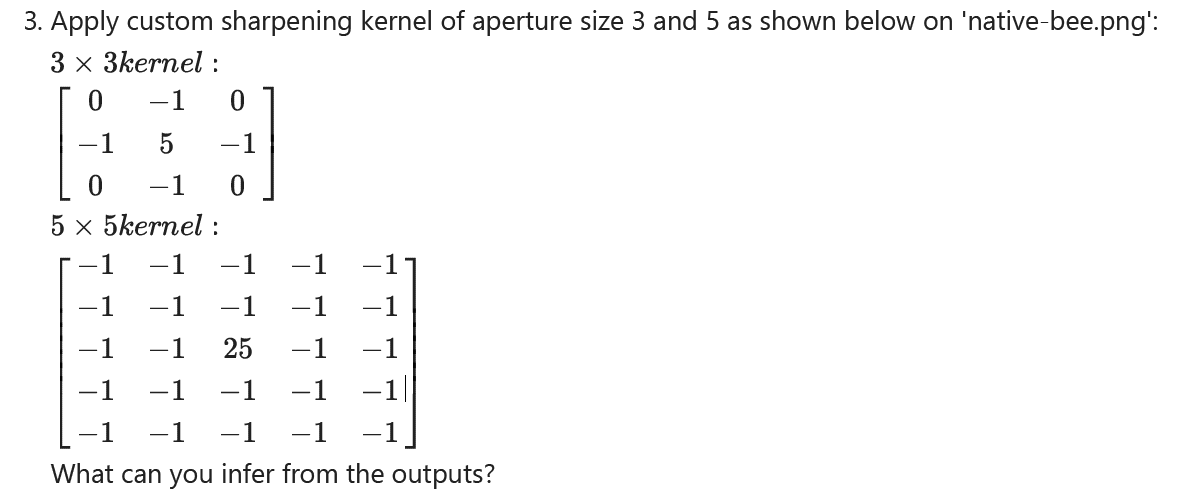

In [12]:
import numpy as np

img = cv.imread("images/native-bee.png")

kernel_3x3 = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])
kernel_5x5 = np.array([[-1, -1, -1, -1, -1],
                       [-1, -1, -1, -1, -1], 
                       [-1, -1, 25, -1, -1], 
                       [-1, -1, -1, -1, -1], 
                       [-1, -1, -1, -1, -1]])

sharpened_3x3 = cv.filter2D(img, -1, kernel_3x3)
sharpened_5x5 = cv.filter2D(img, -1, kernel_5x5)

cv.imshow("Original", img)
cv.imshow("Sharpened 3x3", sharpened_3x3)
cv.imshow("Sharpened 5x5", sharpened_5x5)
cv.waitKey(0)
cv.destroyAllWindows()

### Exercise 4 
##### Apply different image smoothing techniques (e.g. average filter, Gaussian kernel and median filter) on 'noise_lena.jpg' and display the resulting images after the convolution. Comment on the outcomes and deduce the type of noise present on the image.

In [14]:
import matplotlib.pyplot as plt

(<Axes: title={'center': 'Median'}>,
 Text(0.5, 1.0, 'Median'),
 (-0.5, 224.5, 224.5, -0.5))

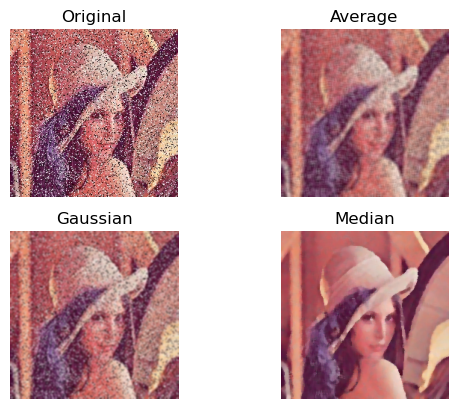

In [15]:
img = cv.imread("images/noise_lena.jpg")

img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

average_filtered = cv.blur(img,(5, 5))
gaussian_filtered = cv.GaussianBlur(img, (5, 5),0)
median_filtered = cv.medianBlur(img,5)

plt.subplot(2,2,1), plt.imshow(img), plt.title("Original"), plt.axis("off")
plt.subplot(2,2,2), plt.imshow(average_filtered), plt.title("Average"), plt.axis("off")
plt.subplot(2,2,3), plt.imshow(gaussian_filtered), plt.title("Gaussian"), plt.axis("off")
plt.subplot(2,2,4), plt.imshow(median_filtered), plt.title("Median"), plt.axis("off")